In [1]:
# Julia - The 5 Lowest Rated Animes

In [2]:
# Load Necessary Libraries
using DataFrames, CSV, StatsPlots, Statistics  

In [3]:
# Load the data
anime = CSV.File("anime.csv") |> DataFrame
rating_complete = CSV.File("rating_complete_sample.csv") |> DataFrame


Row,user_id,anime_id,rating
,Int64,Int64,Int64
1,167332,24151,7
2,71779,7724,9
3,77980,30,8
4,328397,34822,9
5,120244,8057,6
6,97934,20449,8
7,150636,124,6
8,242282,2605,9
9,308200,2994,8


In [4]:
# Ensure there are no missing values in crucial columns:
dropmissing!(anime, Cols(:MAL_ID, :Name, :Score))
dropmissing!(rating_complete, Cols(:anime_id, :rating))


Row,user_id,anime_id,rating
,Int64,Int64,Int64
1,167332,24151,7
2,71779,7724,9
3,77980,30,8
4,328397,34822,9
5,120244,8057,6
6,97934,20449,8
7,150636,124,6
8,242282,2605,9
9,308200,2994,8


In [5]:
# Data Transformation
mean_ratings = combine(groupby(rating_complete, :anime_id), :rating => mean => :mean_rating)


Row,anime_id,mean_rating
,Int64,Float64
1,1,8.77672
2,5,8.34965
3,6,8.20766
4,7,7.51155
5,8,7.10345
6,15,8.072
7,16,8.35392
8,17,7.82524
9,18,8.28045


In [6]:
# Filter Out Animes with 1,000 or Fewer Ratings
# Count the number of ratings per anime
rating_counts = combine(groupby(rating_complete, :anime_id), nrow => :count)

# Filter out animes with 1,000 or fewer ratings
sufficient_ratings = filter(row -> row[:count] > 1000, rating_counts)

# Merge the mean_ratings with sufficient_ratings to get mean ratings only for animes with more than 1000 ratings
mean_ratings_sufficient = innerjoin(mean_ratings, sufficient_ratings, on = :anime_id)


Row,anime_id,mean_rating,count
,Int64,Float64,Int64
1,1,8.77672,2320
2,5,8.34965,1001
3,6,8.20766,1358
4,20,7.81385,3798
5,30,8.2714,2815
6,32,8.42216,1805
7,33,8.46061,1155
8,43,8.21521,1538
9,47,7.90813,1796


In [7]:
# Build Relational Data Model

# Merge the DataFrames
merged_data = leftjoin(mean_ratings_sufficient, anime, on = :anime_id => :MAL_ID)



Row,anime_id,mean_rating,count,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
,Int64,Float64,Int64,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?
1,1,8.77672,2320,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
2,5,8.34965,1001,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
3,6,8.20766,1358,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
4,20,7.81385,3798,Naruto,7.91,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen",Naruto,ナルト,TV,220,"Oct 3, 2002 to Feb 8, 2007",Fall 2002,"TV Tokyo, Aniplex, Shueisha",VIZ Media,Studio Pierrot,Manga,23 min. per ep.,PG-13 - Teens 13 or older,660.0,8,1830540,65586,137167,1462223,61734,99806,69610,216866.0,234481.0,345563.0,286175.0,108155.0,46886.0,15477.0,6098.0,3582.0,5310.0
5,30,8.2714,2815,Neon Genesis Evangelion,8.32,"Action, Sci-Fi, Dementia, Psychological, Drama, Mecha",Neon Genesis Evangelion,新世紀エヴァンゲリオン,TV,26,"Oct 4, 1995 to Mar 27, 1996",Fall 1995,"TV Tokyo, Kadokawa Shoten, Nihon Ad Systems, Audio Tanaka","ADV Films, Netflix","Gainax, Tatsunoko Production",Original,24 min. per ep.,PG-13 - Teens 13 or older,208.0,54,1160651,71308,66549,815938,35566,20358,222240,186797.0,168056.0,157596.0,93532.0,38385.0,17571.0,9686.0,4408.0,3263.0,3714.0
6,32,8.42216,1805,Neon Genesis Evangelion: The End of Evangelion,8.51,"Sci-Fi, Dementia, Psychological, Drama, Mecha",Neon Genesis Evangelion:The End of Evangelion,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,Movie,1,"Jul 19, 1997",Unknown,"TV Tokyo, Toei Animation, Kadokawa Shoten, Movic, Sega, TV Tokyo Music, Audio Tanaka",Manga Entertainment,"Gainax, Production I.G",Original,1 hr. 27 min.,R+ - Mild Nudity,102.0,195,572080,17811,8055,482918,2462,1499,77146,127081.0,95821.0,77593.0,41261.0,16444.0,7057.0,4493.0,2279.0,1941.0,2264.0
7,33,8.46061,1155,Kenpuu Denki Berserk,8.49,"Action, Adventure, Demons, Drama, Fantasy, Horror, Military, Romance, Seinen, Supernatural",Berserk,剣風伝奇ベルセルク,TV,25,"Oct 8, 1997 to Apr 1, 1998",Fall 1997,"VAP, Hakusensha, Nippon Television Network","Media Blasters, NYAV Post",OLM,Manga,25 min. per ep.,R+ - Mild Nudity,108.0,301,432190,18567,19540,276588,12737,9406,113919,58627.0,65906.0,60815.0,29055.0,9477.0,3899.0,1748.0,671.0,456.0,842.0
8,43,8.21521,1538,Koukaku Kidoutai,8.29,"Action, Mecha, Police, Psychological, Sci-Fi, Seinen",Ghost in the Shell,GHOST IN THE SHELL（攻殻機動隊）,Movie,1,"Nov 18, 1995",Unknown,"Bandai Visual, Kodansha",Manga Entertainment,Production I.G,Manga,1 hr. 22 min.,R+ - Mild Nudity,236.0,265,468279,10362,8152,325682,3404,1927,129114,56237.0,65298.0,70881.0,39446.0,13704.0,5107.0

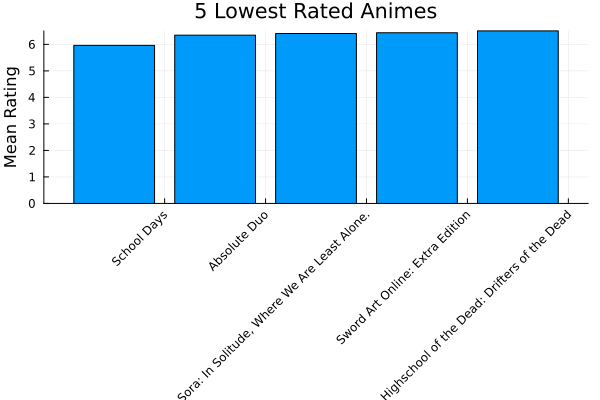

In [8]:
# Visualize the 5 lowest-rated animes using a bar plot
lowest_rated_animes = first(sort(merged_data, :mean_rating), 5)
@df lowest_rated_animes bar(:Name, :mean_rating, legend=false, title="5 Lowest Rated Animes", xlabel="Anime", ylabel="Mean Rating", xticks=(1:5, lowest_rated_animes.Name), xrotation=45)


In [10]:
# Export

# Export mean_ratings to CSV
CSV.write("mean_ratings_julia.csv", mean_ratings)

# Export sufficient_ratings to CSV
CSV.write("sufficient_ratings_julia.csv", sufficient_ratings)

# Export mean_ratings_sufficient to CSV
CSV.write("mean_ratings_sufficient_julia.csv", mean_ratings_sufficient)

# Export merged_data to CSV
CSV.write("merged_data_julia.csv", merged_data)

# Export lowest_rated_animes to CSV
CSV.write("lowest_rated_animes_julia.csv", lowest_rated_animes)


"lowest_rated_animes_julia.csv"